In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target
#print(X,y)

In [4]:
#trainvad = train + validation 0.8
#test = test 0.2
X_trainvad, X_test, y_trainvad, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
# split trainvad into train, validation 3:1
#trainvad = train + validation 0.8
#test = test 0.2
X_train, X_validation, y_train, y_validation = train_test_split(X_trainvad,y_trainvad,test_size=0.25,random_state=42)

In [6]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(90, 4)
(30, 4)
(30, 4)


In [7]:
scores = {}
scores_list = []

In [8]:
k_range = [1,5,10,15,20,25,30,35]
for k in k_range:
    clff = KNeighborsClassifier(n_neighbors = k)
    clff.fit(X_train, y_train)
    y_pred = clff.predict(X_validation)
    scores[k] = metrics.accuracy_score(y_validation,y_pred)
    scores_list.append(metrics.accuracy_score(y_validation,y_pred))

In [9]:
#show the accuracy
scores

{1: 0.9,
 5: 0.9333333333333333,
 10: 0.9333333333333333,
 15: 0.9333333333333333,
 20: 0.9333333333333333,
 25: 0.9666666666666667,
 30: 0.9666666666666667,
 35: 0.9333333333333333}

Text(0, 0.5, 'Accuracy')

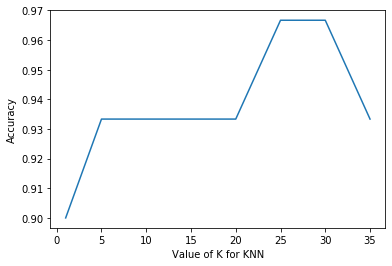

In [10]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

Due to the speed of convergence, k = 25 is better and quicker.

In [11]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is 100.0 %.


Answer: K = 25 is the best parameter. The acuuracy of using the model on testing set is 100%